In [1]:
### Examination of Federer vs Roddick Data Set


In [1]:
# Loading necessary Data Visualisation libraries:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Load the Dataset:
fr = pd.read_csv('FedRod.csv')

fr.head()

,match_id,Pt,Set1,Set2,Gm1,Gm2,Pts,SrvDueceSide,Gm#,TbSet,...,PtsAfter,GmW,Gm1.1,Gm2.1,SetW,Set1.1,Set2.1,RevTB,TBrev,rallyCount
0,20070905-M-US_Open-QF-Roger_Federer-Andy_Roddick,1,0,0,0,0,0-0,True,1,1,...,0-15,0,0,0,0,0,0,NaN,NaN,4
1,20070905-M-US_Open-QF-Roger_Federer-Andy_Roddick,2,0,0,0,0,0-15,False,1,1,...,15-15,0,0,0,0,0,0,NaN,NaN,1
2,20070905-M-US_Open-QF-Roger_Federer-Andy_Roddick,3,0,0,0,0,15-15,True,1,1,...,30-15,0,0,0,0,0,0,NaN,NaN,11
3,20070905-M-US_Open-QF-Roger_Federer-Andy_Roddick,4,0,0,0,0,30-15,False,1,1,...,40-15,0,0,0,0,0,0,NaN,NaN,1
4,20070905-M-US_Open-QF-Roger_Federer-Andy_Roddick,5,0,0,0,0,40-15,True,1,1,...,GM,1,1,0,0,0,0,NaN,NaN,9


In [3]:
# Information on the dataset
fr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1097 entries, 0 to 1096
Data columns (total 53 columns):
match_id            1097 non-null object
Pt                  1097 non-null int64
Set1                1097 non-null int64
Set2                1097 non-null int64
Gm1                 1097 non-null int64
Gm2                 1097 non-null int64
Pts                 1097 non-null object
SrvDueceSide        1097 non-null bool
Gm#                 1097 non-null int64
TbSet               1097 non-null int64
TB?                 1097 non-null int64
TBpt                33 non-null float64
Svr                 1097 non-null int64
Ret                 1097 non-null int64
Serving             1097 non-null object
1st                 1097 non-null object
2nd                 420 non-null object
Notes               12 non-null object
1stNoLet            1097 non-null object
2ndNoLet            420 non-null object
1stSV               1097 non-null int64
2ndSV               420 non-null float64
1stNoSV  

In [4]:
# We're going to need to do some actual exploratory research now

## I think splitting by player might be the best way to analyse

### Creating a Dataset for Each Player as Server
#### This is for Roddick Serving
ar_serve = fr[(fr['Serving']== 'AR')]
#### This is for Federer Serving
rf_serve = fr[(fr['Serving']== 'RF')]

In [5]:
# Let's get a distplot for the average rally length on each player's serve:

## Andy's Serve:
ar_avg_r = ar_serve['rallyCount'].mean()

## Roger's Serve:
rf_avg_r = rf_serve['rallyCount'].mean()

print(ar_avg_r)
print(rf_avg_r)

### Looks like Roger is finishing points slightly quicker

4.001776198934281
3.850187265917603


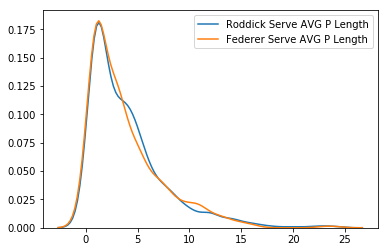

In [6]:
# Federer and Roddick's rally length whilst serving

sns.kdeplot(ar_serve['rallyCount'], label = 'Roddick Serve AVG P Length')
sns.kdeplot(rf_serve['rallyCount'], label = 'Federer Serve AVG P Length')

In [7]:
# Federer and Roddick's serve direction (including Misses)

## Let's do Roddick's First:
### AR Duece Side Statistics
ar_d_srv = ar_serve[(ar_serve['SrvDueceSide'])==True]
### AR Advantage Side Statistics
ar_a_srv = ar_serve[(ar_serve['SrvDueceSide'])==False]
#### AR Duece Side 1st Serve Direction
ar_d_srv['Sv1'].str[0].value_counts() # used str[0] because I only care about direction and not result

# This is already Interesting - ~60% Serves Wide
# My guess is Roddick's main pattern of play here will be:
# First serve Wide, first ball into the open backhand court


4    153
6     91
5     45
R      1
S      1
Name: Sv1, dtype: int64

In [8]:
#### AR Ad Side 1st Serve Direction
ar_a_srv['Sv1'].str[0].value_counts() # Ok these numbers are more normal

6    126
4    105
5     40
S      1
Name: Sv1, dtype: int64

In [9]:
#### AR Duece Side 2nd Serve Direction
ar_d_srv['Sv2'].str[0].value_counts()

# Serve on Deuce side are already interesting,
# we've reverted to a body/backhand centric
# second serve strategy for Second Serves


5    45
6    36
4    13
Name: Sv2, dtype: int64

In [10]:
#### AR Advantage Side 2nd Serve Direction
ar_a_srv['Sv2'].str[0].value_counts()
# No shock completely backhand centric,
# Opening up the court straight away with almost
# No balls being hit to the FH at all

4    79
5    22
6     8
Name: Sv2, dtype: int64

In [11]:
## Let's do Federer's First:
### RF Duece Side Statistics
rf_d_srv = rf_serve[(rf_serve['SrvDueceSide'])==True]
### RF Advantage Side Statistics
rf_a_srv = rf_serve[(rf_serve['SrvDueceSide'])==False]
#### RF Duece Side 1st Serve Direction
rf_d_srv['Sv1'].str[0].value_counts() # used str[0] because I only care about direction and not result

# This is already Interesting - ~60% Serves Wide
# My guess is Roddick's main pattern of play here will be:
# First serve Wide, first ball into the open backhand court


4    136
6    106
5     32
S      2
Name: Sv1, dtype: int64

In [12]:
#### RF Ad Side 1st Serve Direction
rf_a_srv['Sv1'].str[0].value_counts()

# Really interesting to see how Federer is more balanced with First Serve on both sides
# Again, near 5050 for BH vs the rest on the ad side

4    138
6     99
5     20
R      1
Name: Sv1, dtype: int64

In [13]:
#### RF Duece Side 2nd Serve Direction
rf_d_srv['Sv2'].str[0].value_counts()

# Heavily backhand centric on Second serves on the Duece side

6    47
5    44
4    22
Name: Sv2, dtype: int64

In [14]:
#### RF Ad side 2nd Serve Direction
rf_a_srv['Sv2'].str[0].value_counts()

# Again, heavily backhand centric

4    63
5    21
6    20
Name: Sv2, dtype: int64

In [19]:
###########################################################################
###########################################################################

# Ok, I'm very curious WRT serve direction and % of points won for each player
# Obviously Roddick lost, I'd like to focus on him first

## First we need to get all points on the FH side where Roddick hit the
## First serve in. For this we want ["Sv2" = Null]

################################################################################
### Below is exclusively used for finding AR's Win % on First Serves Wide on the Duece Side
### It is way too long and poorly formatted in my honest opinion
### It does however get the information I'm looking for, albeit
### in an incredibly Hack fashion

# Let's start by looking at all of his Duece Side 1st Serves that went in:
ar_1st_d_in = ar_d_srv[(ar_d_srv['Sv2'].isna())] # This is 197 Points
# Now let's get a count of points won by direction vs points played:
## This might take my lack of python skills a few steps and a lot of inefficiency
#########################################################
######## Steps for Wide on Duece Side 1st Serve #########
#########################################################

s1 = ar_1st_d_in #preprocessing step
s1['Sv1'] = s1['Sv1'].str[0] #preprocessing step - get rid of results after Srv
s2 = s1[(s1['Sv1']=='4')] #preprocessing step - only view the wide 1st serves
s3 = s2['isSvrWinner'].value_counts() #preprocessing step - getting a count of serves won using wide serve
s4 = s3 #preprocessing step - unsure why

#########################################################
######## Steps for Body on Duece Side 1st Serve #########
#########################################################


s2b = s1[(s1['Sv1']=='5')] #preprocessing step - only view the Body 1st serves
s3b = s2b['isSvrWinner'].value_counts() #preprocessing step - getting a count of serves won using body serve
s4b = s3b #preprocessing step - unsure why
# Obviously steps are very similar to above

#########################################################
######### Steps for Tee on Duece Side 1st Serve #########
#########################################################

s2t = s1[(s1['Sv1']=='6')] #preprocessing step - only view the Tee 1st serves
s3t = s2t['isSvrWinner'].value_counts() #preprocessing step - getting a count of serves won using Tee serve
s4t = s3t #preprocessing step - unsure why
# Obviously steps are very similar to above
# Again, I'd imagine this is pretty poor coding practice, 
# whereby I'm just making way too many variables.
# At the moment I'm literally just using s(x)[y], where
# (x) equals the step in preprocessing, and [y] equals
# the direction of the serve

##########################################################
# Wide Duece Side 1st Serve Win %
ar_1st_d_wide_pct = "Andy Roddick is winning {} % of 1st Serves when hitting Wide on the Duece Court, or {} of {} points.".format((s4[1]/(s4[1]+s4[0])), s4[1], s4[1]+s4[0])
print(ar_1st_d_wide_pct)
# Body Duece Side 1st Serve Win %
ar_1st_d_body_pct = "Andy Roddick is winning {} % of 1st Serves when hitting Body on the Duece Court, or {} of {} points.".format((s4b[1]/(s4b[1]+s4b[0])), s4b[1], s4b[1]+s4b[0])
print(ar_1st_d_body_pct)
# Tee Duece Side 1st Serve Win %
ar_1st_d_tee_pct = "Andy Roddick is winning {} % of 1st Serves when hitting Tee on the Duece Court, or {} of {} points.".format((s4t[1]/(s4t[1]+s4t[0])), s4t[1], s4t[1]+s4t[0])
print(ar_1st_d_tee_pct)

Andy Roddick is winning 0.6272727272727273 % of 1st Serves when hitting Wide on the Duece Court, or 69 of 110 points.
Andy Roddick is winning 0.7058823529411765 % of 1st Serves when hitting Body on the Duece Court, or 24 of 34 points.
Andy Roddick is winning 0.803921568627451 % of 1st Serves when hitting Tee on the Duece Court, or 41 of 51 points.


/Users/nicholasturnham/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [66]:
#########################################################
########## Some Observations on Roddick Duece  ##########
########## Side 1st Serve Win Rate Percentages ##########
#########################################################
# It's a bit odd that Andy's going majority wide to
# Federer's Forehand wing. I can think of two reasons:
# 1) Federer is probably forced to hit back to Andy's FH
# 2) It opens up the court for the next shot
# The only problem with hypothesis (2) is that if that
# were the case, we'd be expecting Andy to be winning a lot
# of points after hitting his first serve wide



In [78]:
# We could always examine how many times he's hitting each serve in

## Which is what we've done here below:
### Again with unecessary/hack code:
df11 = ar_d_srv['Sv1'].value_counts() #preprocessing step - getting all first serve directions

# Roddick Duece Side Wide Serves (By DF Location) - preprocessing step
duece_wide_pct = (df11[0]+df11[8]+df11[12]+df11[17])/(df11[0]+df11[8]+df11[12]+df11[4]+df11[7]+df11[9]+df11[16]+df11[17]+df11[21])

# Roddick Duece Side Body Serves (By DF Location) - preprocessing step
duece_body_pct = (df11[1]+df11[18])/(df11[1]+df11[18]+df11[10]+df11[11])

# Roddick Duece Side Tee Serves (By DF Location) - preprocessing step
duece_tee_pct = (df11[2]+df11[5]+df11[13])/(df11[2]+df11[5]+df11[13]+df11[3]+df11[6]+df11[14]+df11[15]+df11[21])

# Printing all Duece Side Serves by Direction
print("Roddick Duece Side 1st Serve Body Serve Accuracy Is:",duece_wide_pct, "%, Serving there", ((153)/(153+45+91)), "%") # The numbers from above are found at "ar_d_srv['Sv1'].str[0].value_counts()"
print("Roddick Duece Side 1st Serve Body Serve Accuracy Is:",duece_body_pct, "%, Serving there", ((45)/(153+45+91)), "%")
print("Roddick Duece Side 1st Serve Tee Serve Accuracy Is:",duece_tee_pct, "%, Serving there", ((91)/(153+45+91)), "%")

Roddick Duece Side 1st Serve Body Serve Accuracy Is: 0.7142857142857143 %, Serving there 0.5294117647058824 %
Roddick Duece Side 1st Serve Body Serve Accuracy Is: 0.7555555555555555 %, Serving there 0.15570934256055363 %
Roddick Duece Side 1st Serve Tee Serve Accuracy Is: 0.5604395604395604 %, Serving there 0.314878892733564 %


In [169]:
# Roddick, Second Serve Directions:

## Duece Side:

stepuno = ar_d_srv['Sv2'].str[0] # preprocessing step, getting rid of all results after the serve was hit
ssdd = stepuno.value_counts()


print("Duece Side Second Serve Frequency")
# Wide second Serve Frequency Duece Side
dswss = ssdd[2]/(ssdd[2]+ssdd[1]+ssdd[0])
print("Wide Serves Duece Side: ", dswss)

# Body Second Serve Frequency Duece Side
dsbss = ssdd[0]/(ssdd[1]+ssdd[2]+ssdd[0])
print("Body Serves Duece Side: " ,dsbss)

# Tee Second Serve Frequency Duece Side
dstss = ssdd[1]/(ssdd[1]+ssdd[2]+ssdd[0])
print("Tee Serves Duece Side: " ,dstss)


print('\n')
## Ad Side Second Serve Frequency:

stepdos = ar_a_srv['Sv2'].str[0]
ssad = stepdos.value_counts()

print("Ad Side Second Serve Frequency")
# Wide Second Serve Frequency Ad Side
aswss = ssad[0]/(ssad[0]+ssad[1]+ssad[2])
print("Wide Serves Ad Side:" ,aswss)

# Body Second Serve Frequency Ad Side
asbss = ssad[1]/(ssad[0]+ssad[1]+ssad[2])
print("Body Serves Ad Side: ", asbss)

# Tee Second Serve Frequency Ad Side
astss = ssad[2]/(ssad[0]+ssad[1]+ssad[2])
print("Tee Serves Ad Side: " ,astss)

Duece Side Second Serve Frequency
Wide Serves Duece Side:  0.13829787234042554
Body Serves Duece Side:  0.4787234042553192
Tee Serves Duece Side:  0.3829787234042553


Ad Side Second Serve Frequency
Wide Serves Ad Side: 0.7247706422018348
Body Serves Ad Side:  0.2018348623853211
Tee Serves Ad Side:  0.07339449541284404


In [183]:
# WE should probably add the Second Serve Accuracy Data too

### Duece Side Second Serve Data For Roddick 
sf2 = ar_d_srv['Sv2'].value_counts() # preprocessing - Only looking at Second Serves on the Duece Side

print("Deuce Side Second Serve Accuracy")

# Accuracy on Wide Serve For Second Serve Duece Court
d_2s_w = (sf2[2])/(sf2[2]+sf2[6])
print("Wide Accuracy ", d_2s_w)

# Accuracy on Body Serve For Second Serve Duece Court
d_2s_b = (sf2[5])/(sf2[5])
print("Body Accuracy ", d_2s_b)

# Accuracy on Tee Serve For Second Serve Duece Court
d_2s_t = (sf2[1])/(sf2[1]+sf2[3]+sf2[4]+sf2[5])
print("Tee Accuracy ", d_2s_t)

print('\n')

### Ad Side Second Serve Accuracy Data for Roddick
print("Ad Side Second Serve Accuracy")

sf3 = ar_a_srv['Sv2'].value_counts() # preprocessing - only looking at Second serves on the Ad side


# Accuracy on the Ad Side Wide Second Serve
a_2s_w = (sf3[0]+sf3[4])/(sf3[0]+sf3[3]+sf3[4])
print("Wide Accuracy ", a_2s_w)

# Accuracy on the Ad Side Body Second Serve
a_2s_b = sf3[1]/sf3[1]
print("Body Accuracy ", a_2s_b)

# Accuracy on the Ad Side Tee Second Serve
a_2s_t = (sf3[2]+sf3[5])/(sf3[2]+sf3[5])
print("Tee Accuracy " , a_2s_t)

Deuce Side Second Serve Accuracy
Wide Accuracy  0.9230769230769231
Body Accuracy  1.0
Tee Accuracy  0.8333333333333334


Ad Side Second Serve Accuracy
Wide Accuracy  0.9620253164556962
Body Accuracy  1.0
Tee Accuracy  1.0


In [75]:
# Let's look at the same Data on the Ad Side:

df12 = ar_a_srv['Sv1'].value_counts()


ad_wide_pct = (df12[0]+df12[12]+df12[13])/(df12[0]+df12[12]+df12[13]+df12[4]+df12[7]+df12[14]+df12[15])
ad_body_pct = (df12[2])/(df12[2]+df12[10]+df12[11])
ad_tee_pct =  (df12[1]+df12[5]+df12[9])/(df12[1]+df12[5]+df12[9]+df12[3]+df12[6]+df12[8]+df12[17])

# Printing all Ad Side Serves by Direction
print("Roddick Ad Side 1st Serve Wide Serve Accuracy Is:", ad_wide_pct, "% , Serving there", ((105)/(105+40+126)), "%") # The numbers from above are found at "ar_a_srv['Sv1'].str[0].value_counts()"
print("Roddick Ad Side 1st Serve Body Serve Accuracy Is:",ad_body_pct, "%, Serving there", ((40)/(105+40+126)), "%")
print("Roddick Ad Side 1st Serve Tee Serve Accuracy Is:",ad_tee_pct, "%, Serving there", ((126)/(105+40+126)), "%")

Roddick Ad Side 1st Serve Wide Serve Accuracy Is: 0.6285714285714286 % , Serving there 0.3874538745387454 %
Roddick Ad Side 1st Serve Body Serve Accuracy Is: 0.675 %, Serving there 0.14760147601476015 %
Roddick Ad Side 1st Serve Tee Serve Accuracy Is: 0.5476190476190477 %, Serving there 0.46494464944649444 %


In [192]:
################################################################################
##################### Complete Roddick 1st Serve Data ##########################
################################################################################
################################################################################
####### Duece Side Statistics ##################################################
print('xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx')
print('xxxx Roddick Service Statistics xxxx')
print('xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx')
print('x')
print('xx Roddick Duece Side Statistics xx')
print('x  -----------------------------')
print('x 1st Serve Direction Frequency')
print('x Count:' ,(153+45+91), 'Serves')
print('x  ---')
print('x Wide:', ((153)/(153+45+91)), "%")
print('x Body:', ((45)/(153+45+91)), "%")
print('x Tee:', ((91)/(153+45+91)), "%")
print('x')
print('x 1st Serve Direction Accuracy')
print('x Wide:', duece_wide_pct, "%")
print('x Body:', duece_body_pct, "%")
print('x Tee:', duece_tee_pct, "%")
print('x')
print('x 2nd Serve Direction Frequency')
print('x Count:' ,(ssdd[2]+ssdd[1]+ssdd[0]), 'Serves')
print('x  ---')
print('x Wide:', dswss, "%")
print('x Body:', dsbss, "%")
print('x Tee:', dstss, "%")
print('x')
print('x 2nd Serve Direction Accuracy')
print('x Wide:', d_2s_w, "%")
print('x Body:', d_2s_b, "%")
print('x Tee:', d_2s_t, "%")
print('x')
print('xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx')
print('xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx')
print('x')
print('xx Roddick Ad Side Statistics xx')
print('x  --------------------------')
print('x 1st Serve Direction Frequency')
print('x Count:' ,((105+40+126)), 'Serves')
print('x  ---')
print('x Wide:', ((105)/(105+40+126)), "%")
print('x Body:', ((40)/(105+40+126)), "%")
print('x Tee:', ((126)/(105+40+126)), "%")
print('x')
print('x 1st Serve Direction Accuracy')
print('x Wide:', ad_wide_pct, "%")
print('x Body:', ad_body_pct, "%")
print('x Tee:', ad_tee_pct, "%")
print('x')
print('x 2nd Serve Direction Frequency')
print('x Count:' ,(ssad[2]+ssad[1]+ssad[0]), 'Serves')
print('x  ---')
print('x Wide:', aswss, "%")
print('x Body:', asbss, "%")
print('x Tee:', astss, "%")
print('x')
print('x 2nd Serve Direction Accuracy')
print('x Wide:', a_2s_w, "%")
print('x Body:', a_2s_b, "%")
print('x Tee:', a_2s_t, "%")
print('x')
print('xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx')
print('xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx')

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
xxxx Roddick Service Statistics xxxx
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
x
xx Roddick Duece Side Statistics xx
x  -----------------------------
x 1st Serve Direction Frequency
x Count: 289 Serves
x  ---
x Wide: 0.5294117647058824 %
x Body: 0.15570934256055363 %
x Tee: 0.314878892733564 %
x
x 1st Serve Direction Accuracy
x Wide: 0.7142857142857143 %
x Body: 0.7555555555555555 %
x Tee: 0.5604395604395604 %
x
x 2nd Serve Direction Frequency
x Count: 94 Serves
x  ---
x Wide: 0.13829787234042554 %
x Body: 0.4787234042553192 %
x Tee: 0.3829787234042553 %
x
x 2nd Serve Direction Accuracy
x Wide: 0.9230769230769231 %
x Body: 1.0 %
x Tee: 0.8333333333333334 %
x
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
x
xx Roddick Ad Side Statistics xx
x  --------------------------
x 1st Serve Direction Frequency
x Count: 271 Serves
x  ---
x Wide: 0.3874538745387454 %
x Body: 0.14760147601476015 %
x Tee: 0.46494464944649444 %
x
x 1st Serve D

In [107]:
print(ar_1st_d_wide_pct)
# Body Duece Side 1st Serve Win %
ar_1st_d_body_pct = "Andy Roddick is winning {} % of 1st Serves when hitting Body on the Duece Court, or {} of {} points.".format((s4b[1]/(s4b[1]+s4b[0])), s4b[1], s4b[1]+s4b[0])
print(ar_1st_d_body_pct)
# Tee Duece Side 1st Serve Win %
ar_1st_d_tee_pct = "Andy Roddick is winning {} % of 1st Serves when hitting Tee on the Duece Court, or {} of {} points.".format((s4t[1]/(s4t[1]+s4t[0])), s4t[1], s4t[1]+s4t[0])
print(ar_1st_d_tee_pct)

Andy Roddick is winning 0.6272727272727273 % of 1st Serves when hitting Wide on the Duece Court, or 69 of 110 points.
Andy Roddick is winning 0.7058823529411765 % of 1st Serves when hitting Body on the Duece Court, or 24 of 34 points.
Andy Roddick is winning 0.803921568627451 % of 1st Serves when hitting Tee on the Duece Court, or 41 of 51 points.


In [140]:
### Let's look at point length

rc = fr[(fr['rallyCount']>4)]
print(rc.rallyCount)

# Ok, so there were 357 points that went over 5 Shots

rf_rc = rc[(rc['Serving']=='RF')]
rf_rc.head()

2       11
4        9
5       12
8       12
9        7
10       8
11       5
12      17
21      10
24       7
25       9
32      11
35       8
38       6
42       5
43       5
44       5
50       5
55       6
56       7
57       5
59      18
63       5
64      11
69      16
72      11
74       5
77       7
84       5
97       7
        ..
1020     6
1021    11
1024     9
1028     5
1030     9
1031     9
1032     5
1033    16
1035     8
1041     7
1043     5
1044     7
1046     5
1048     7
1049     5
1050     8
1051     8
1053    23
1058    10
1060     5
1064     5
1069    14
1073     5
1074     7
1080     5
1081     9
1086     5
1090     7
1092    12
1094     7
Name: rallyCount, Length: 357, dtype: int64


,match_id,Pt,Set1,Set2,Gm1,Gm2,Pts,SrvDueceSide,Gm#,TbSet,...,PtsAfter,GmW,Gm1.1,Gm2.1,SetW,Set1.1,Set2.1,RevTB,TBrev,rallyCount
2,20070905-M-US_Open-QF-Roger_Federer-Andy_Roddick,3,0,0,0,0,15-15,True,1,1,...,30-15,0,0,0,0,0,0,NaN,NaN,11
4,20070905-M-US_Open-QF-Roger_Federer-Andy_Roddick,5,0,0,0,0,40-15,True,1,1,...,GM,1,1,0,0,0,0,NaN,NaN,9
21,20070905-M-US_Open-QF-Roger_Federer-Andy_Roddick,22,0,0,2,2,0-0,True,5,1,...,0-15,0,2,2,0,0,0,NaN,NaN,10
24,20070905-M-US_Open-QF-Roger_Federer-Andy_Roddick,25,0,0,2,2,30-15,False,5,1,...,40-15,0,2,2,0,0,0,NaN,NaN,7
25,20070905-M-US_Open-QF-Roger_Federer-Andy_Roddick,26,0,0,2,2,40-15,True,5,1,...,GM,1,3,2,0,0,0,NaN,NaN,9


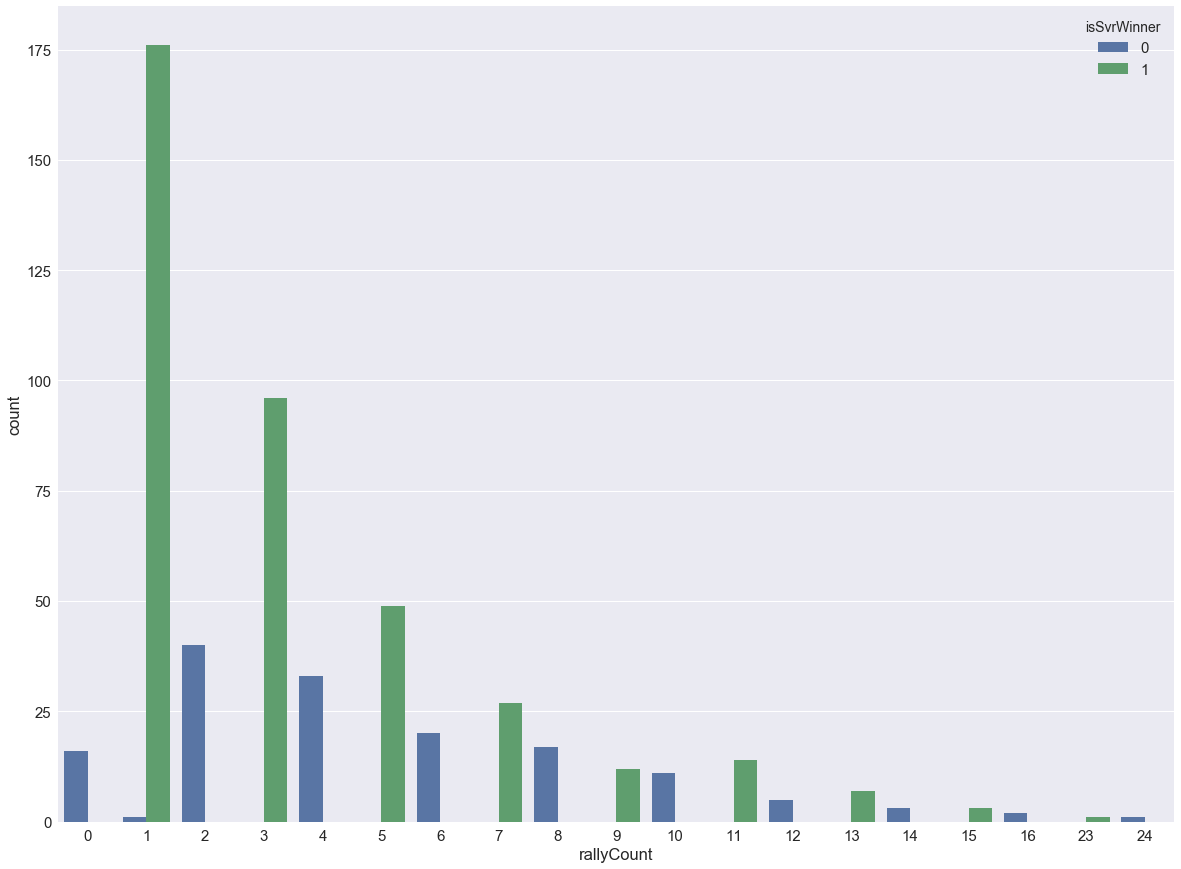

In [161]:
#### Let's just look at all points in the match by serve - that way we 
#### Can see if either player is crushing points over a certain number
#### (Hint we're expecting it to be Federer)

# "1" represents the server was the winner of the point

####### Seaborn Formatting #######
plt.subplots(figsize=(20,15))
sns.set(font_scale=1.5)
##### End Seaborn Formatting #####

## Federer's Points won on serve (by Length)
sns.countplot(x=rf_serve.rallyCount, hue=rf_serve.isSvrWinner)




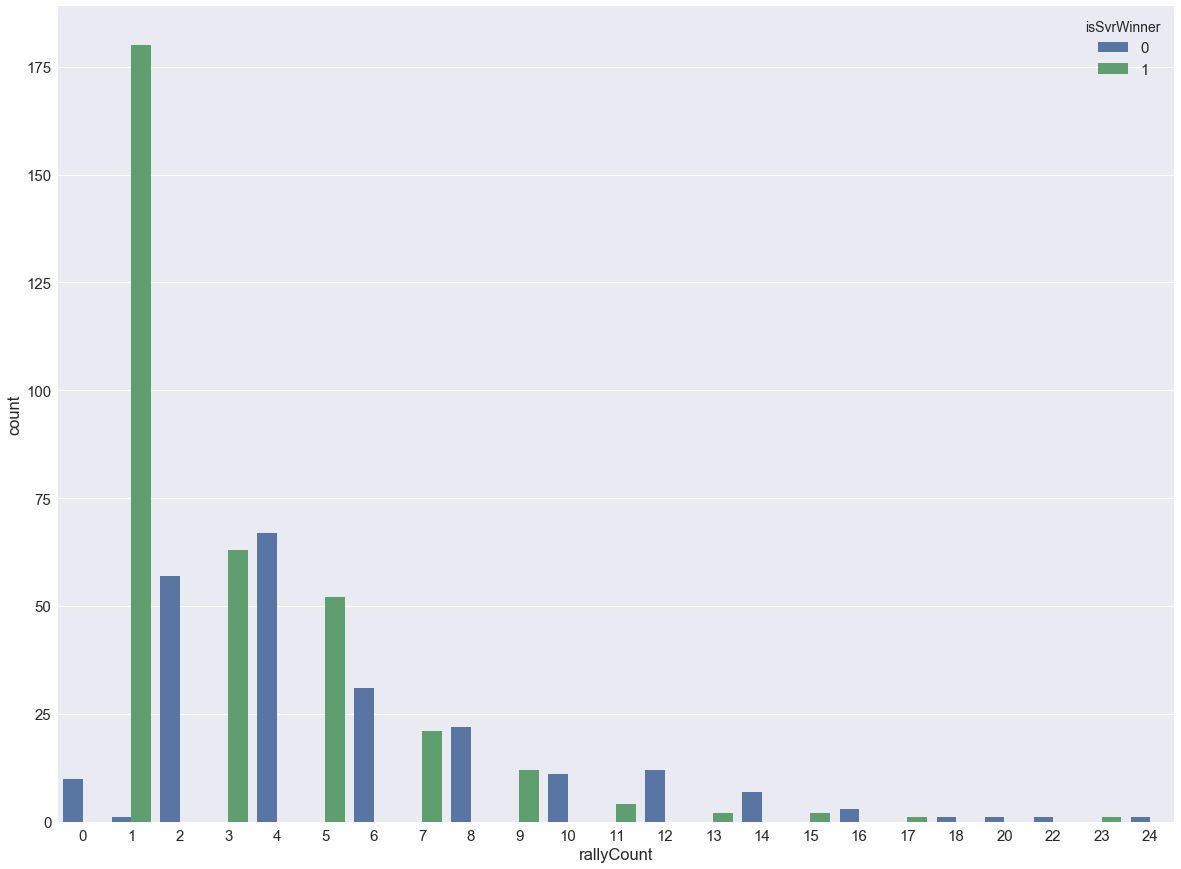

In [162]:
## Roddick's Points won on serve (by Length)
# "1" represents the server was the winner of the point
####### Seaborn Formatting #######
plt.subplots(figsize=(20,15))
sns.set(font_scale=1.5)
##### End Seaborn Formatting #####


# Roddick's Points won on Serve
sns.countplot(x=ar_serve.rallyCount, hue=ar_serve.isSvrWinner)

In [164]:
#### Some interesting Notes
### Ok, so after around 5 shots, Federer is the favourite to win the rally.
### This isn't particularly interesting, but 



In [165]:
# aedanr.roberts@uts.edu.au

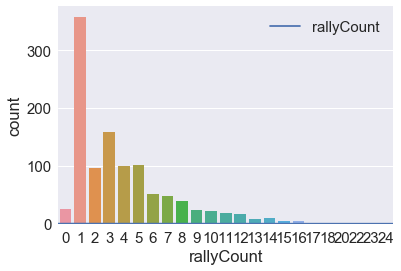

In [185]:
### Just Double Checking the Rally Length
sns.countplot(x = fr.rallyCount)


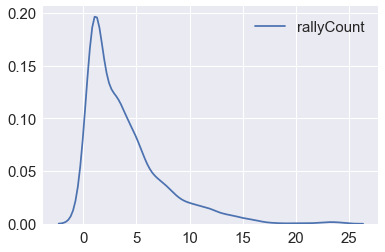

In [184]:
### Still DOuble Checking Rally Length
######################################################################################################
######################################################################################################sns.kdeplot(fr.rallyCount)

In [186]:
######################################################################################################
######################################################################################################
######################################################################################################
######################################################################################################
######################################################################################################
######################################################################################################
########## OK so this point in the exploratory data is a new section of work. At this stage ##########
########## I think it's best to start trying to tokenize data. I'm going to learn how to    ##########
########## tokenize data first using just a singular dataset, and then from there we can    ##########
########## Expand if needs be. Let's just start with something like the Roddick First Serve ##########
########## Dataset as a baseline. We might even need to structure it just on the Duece Side ##########
######################################################################################################
######################################################################################################
######################################################################################################
######################################################################################################
######################################################################################################
######################################################################################################




In [196]:
# Choosing the Opening Dataset
## Roddick 1st Serves on the Duece Side
### Sure, it's oddly specific, but simplification for learning the process of tokenization seems ideal


# Here we've created a variable for all of Roddicks 1st Serve Points on the Forehand Side
# For this, First serve HAD TO GO IN, there was NO SECOND SERVE POINTS here
ar_token = ar_d_srv[(ar_d_srv['Sv2'].isnull())]



match_id            197
Pt                  197
Set1                197
Set2                197
Gm1                 197
Gm2                 197
Pts                 197
SrvDueceSide        197
Gm#                 197
TbSet               197
TB?                 197
TBpt                  2
Svr                 197
Ret                 197
Serving             197
1st                 197
2nd                   0
Notes                 1
1stNoLet            197
2ndNoLet              0
1stSV               197
2ndSV                 0
1stNoSV             197
2ndNoSV               0
1stIn               197
2ndIn                 0
isRally1st          197
isRally2nd          197
Sv1                 197
Sv2                   0
Rally               159
isAce               197
isUnret             197
isRallyWinner       197
isForced            197
isUnforced          197
isDouble            197
rallyNoSpec         159
rallyNoError        159
rallyNoDirection    159
rallyLen            197
PtWinner        